In [1]:
import sympy as sym
import numpy as np
sym.init_printing()

import matplotlib
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
alpha, r, lam, R, v, u, beta, c = sym.symbols('alpha, r, L, R, v, u, beta, c')

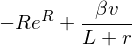

In [3]:
workers =  beta * v / (r + lam) -R* sym.exp(R)
workers

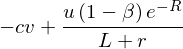

In [4]:
firms = u*sym.exp(-R)*(1-beta)/(r+lam)-v*c
firms

In [5]:
steadystate = u*v*sym.exp(-R)-lam*(1-u)
steadystate

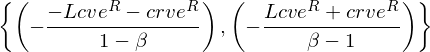

In [6]:
sym.nonlinsolve([workers,firms],[u])

In [7]:
st_frm = sym.nonlinsolve([v/(lam*(1-u))-(1-beta)/(c*(r+lam))],[R])
st_frm

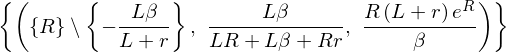

In [8]:
solution = sym.nonlinsolve([firms, workers, steadystate], [R, u, v])

solution

In [9]:
R_sol

NameError: name 'R_sol' is not defined

In [ ]:
v_sol

In [ ]:
welfare = (1-u)*(R_sol+beta)
welfare

In [ ]:
foc_welfare_u = sym.diff(welfare, u)
sym.solveset(foc_welfare_u, u, domain = sym.S.Reals)

In [ ]:
foc_welfare_beta = sym.diff(welfare, beta)
sym.solveset(foc_welfare_beta, beta, domain = sym.S.Reals)
#foc_welfare_beta

In [ ]:
sym.nonlinsolve([beta * lam /(r+lam)*(1-u)/u+sym.log(c*(1-u)/(u*(1-beta)))-sym.log(u)],[u])

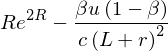

In [10]:
f_w = R*sym.exp(2*R)-u*(1-beta)*beta/(c*(r+lam)**2)
f_w

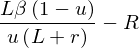

In [11]:
s_w = (1-u)/u*lam*beta/(r+lam)-R
s_w

## try a numerical solution

In [301]:
u_vals = [solver(i)[0] for i in np.linspace(.11,1,20,endpoint=False)]
R_vals = [solver(i)[1] for i in np.linspace(.11,1,20,endpoint=False)]
welf = [solver(i)[1]*(1-solver(i)[0]) for i in np.linspace(.11,1,20,endpoint=False)]
welf

In [302]:
plt.plot(u_vals,R_vals,u_vals,welf, 'o')


### find the social optimum

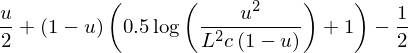

In [191]:
welf_u = (1/2*sym.log(u**2/(lam**2*(1-u)*c))+1)*(1-u)-(1-u)/2
welf_u

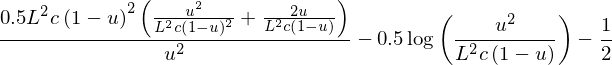

In [192]:
foc_welf_u = sym.diff(welf_u,u)
foc_welf_u

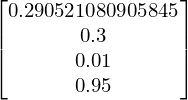

In [197]:
s_opt = sym.nsolve((foc_welf_u,lam-0.3,r-.95,c-.01),(u,lam,c,r),(.1,1,.1, .95))
s_opt

In [205]:
def optRvofU(u,lam,c):
    return [sym.log(u**2/(lam**2*(1-u)*c))/2,lam*(1-u)/u*u**2/(lam**2*(1-u)*c)]

In [212]:
opt_u_pt = [s_opt[0]]
opt_R_pt = [optRvofU(s_opt[0],s_opt[1],s_opt[2])[0]]
opt_welf_pt = [(optRvofU(s_opt[0],s_opt[1],s_opt[2])[0]+1)*(1-s_opt[0])-
               optRvofU(s_opt[0],s_opt[1],s_opt[2])[1]*s_opt[2]]


In [64]:
plt.plot(u_vals,R_vals,u_vals,welf, 'o',opt_u_pt, opt_R_pt,'rx',opt_u_pt,opt_welf_pt,'ro')


NameError: name 'u_vals' is not defined

In [247]:
def bob(x):
    return [sym.nsolve((u**2-i),(u),(1)) for i in x]
bob([1,2])

In [247]:
def bob(x):
    return [sym.nsolve((u**2-i),(u),(1)) for i in x]
bob([1,2])

In [65]:
def ModelSolver(B,L,r_val,c_val):
    try: 
        out = sym.nsolve(((1-u)/u*lam*beta/(r+lam)-R,
                       R*sym.exp(2*R)-u*(1-beta)*beta/(c*(r+lam)**2),
                       lam-L,r-r_val,c-c_val,beta-B),
                      (u,R,lam,c,beta,r),(.1,1,L,c_val,B,r_val))
    except: 
        out = sym.Matrix([float("NaN")]*6)
    return out
def SocialOpt(L,r_val,c_val):
    welf_u = (1/2*sym.log(u**2/(lam**2*(1-u)*c))+1)*(1-u)-(1-u)/2
    foc_welf_u = sym.diff(welf_u,u)
    
    s_opt = sym.nsolve((foc_welf_u, lam-L,r-r_val,c-c_val),(u,lam,c,r),(.1,L,c_val,r_val))
    opt_u = s_opt[0]
    opt_R = sym.log(s_opt[0]**2/(L**2*(1-s_opt[0])*c_val))/2 
    
    opt_welf = welf_u.subs([(u,opt_u),(lam,L),(c,c_val)])
    
    return [opt_u, opt_R, opt_welf]

SocialOpt(.3,.95,.01)

<IPython.core.display.Javascript object>


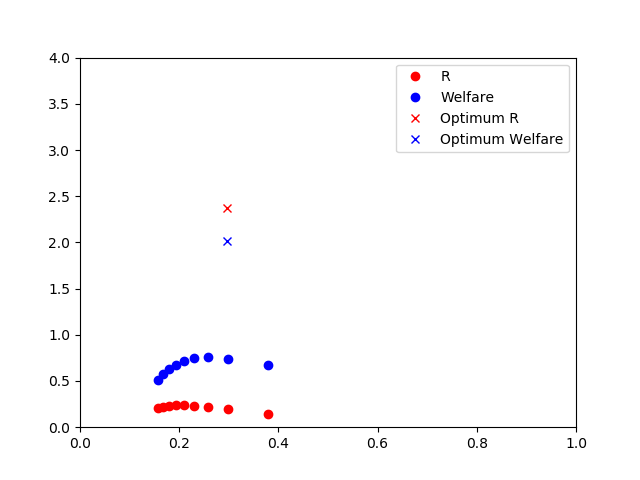

interactive(children=(FloatSlider(value=0.3, description='lam', max=1.0, step=0.05), FloatSlider(value=0.95, d…

In [78]:
#%xmode Verbose
import ipywidgets as ipw 
x = np.linspace(0,1,15,endpoint=False)

fig = plt.figure()

ax = fig.add_subplot(1,1,1)
lineR, = ax.plot([ModelSolver(B, 0.3, 0.95, 0.01)[0] for B in x],
                 [ModelSolver(B, 0.3, 0.95, 0.01)[1] for B in x],
                 'ro',label='R')

lineWel, = ax.plot([ModelSolver(B, 0.3, 0.95, 0.01)[0] for B in x],
                  [(ModelSolver(B, 0.3, 0.95, 0.01)[1]+B)*(1-ModelSolver(B, 0.3, 0.95, 0.01)[0]) for B in x],
                  'bo',label='Welfare')

optimum = SocialOpt(.3,.95,.01)

dot_optR, = ax.plot([optimum[0]],[optimum[1]],
                  'rx' ,label='Optimum R')
dot_optWelf, = ax.plot([optimum[0]],[optimum[2]],
                  'bx' ,label='Optimum Welfare')

plt.legend()
plt.xlim(0,1)
plt.ylim(0,4)

def update(lam=0.3, r = .95, c = .01):
    data = [ModelSolver(B, lam, r, c) for B in x]
    optimum = SocialOpt(lam,r,c)

    lineR.set_ydata([res[1] for res in data])
    lineR.set_xdata([res[0] for res in data])
    lineWel.set_xdata([res[0] for res in data])
    lineWel.set_ydata([(res[1] + res[4] )*(1-res[0]) for res in data])
    
    dot_optR.set_ydata([optimum[1]])
    dot_optR.set_xdata([optimum[0]])
    
    dot_optWelf.set_ydata([optimum[2]])
    dot_optWelf.set_xdata([optimum[0]])
    
    fig.canvas.draw()
    
ipw.interact(update, lam=(0.0,1.0,.05), r=(0.,1.0,.01), c=(0.0,1,.01));


In [59]:
data = [ModelSolver(B, 0.3, 0.95, 0.01) for B in x]
[res[0] for res in data]